In [4]:
import warnings
warnings.filterwarnings('ignore')

import io
import base64
import yaml

import pandas as pd

from IPython.core.display import display, HTML
from PIL import Image

In [5]:
def parse_args_from_file(file_path):
    with open(file_path, 'r', encoding = 'utf-8') as f:
        config = yaml.safe_load(f)
    return config

# A. 1 үг танихаар сургасан модел

In [6]:
config = parse_args_from_file("mn_conf/demo_parameters_conf.yaml")
config

{'image_folder': 'D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/',
 'saved_model': 'D:/Ground/BolorSoft-OCR/saved_models/eduge_news_uls_tur_words_cyrillic_g2_v3_single_word/best_accuracy.pth',
 'batch_max_length': 80,
 'imgH': 32,
 'imgW': 100,
 'rgb': False,
 'character': '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzҮӨАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯүөабвгдеёжзийклмнопрстуфхцчшщъыьэюяЂђЃѓЄєІіЇїЈјЉљЊњЋћЌќЎўЏџҐґҒғҚқҮүҲҳҶҷӀӏӢӣӮӯ!#$%&()*+,-./:;<=>?@[\\]№_{|}~ €₽\n',
 'Transformation': 'None',
 'FeatureExtraction': 'VGG',
 'SequenceModeling': 'BiLSTM',
 'Prediction': 'CTC',
 'input_channel': 1,
 'output_channel': 256,
 'hidden_size': 256}

In [7]:
output = !python deep-text-recognition-benchmark/demo.py --demo_conf mn_conf/demo_parameters_conf.yaml

,img,id,label,conf
13,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/Хавар_4.jpg,хавар,0.9777
12,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img_1.jpg,тэмүүжин,0.9951
11,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img_0.jpg,тэмүүжин,0.9975
5,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img9.jpg,өөгшүүлсэн,0.5024
4,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img8.jpg,хүүрнэх,0.9879
3,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img7.jpg,хэтрүүлэхгүйн,0.5443
2,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img5.jpg,хайгуулаа,0.8976
1,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img4.jpg,тээвэрлэгчийг,0.3540
10,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img327.jpg,сэргээхтэй,0.2882
9,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img322.jpg,суугааг,0.9980

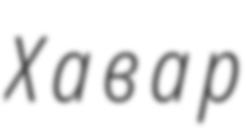
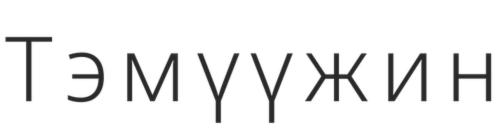
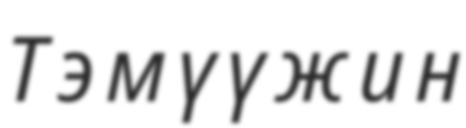
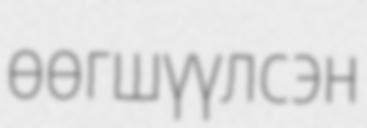
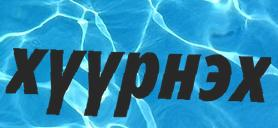
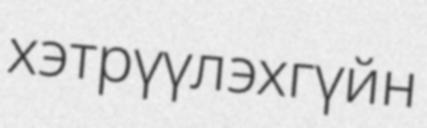
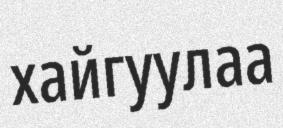
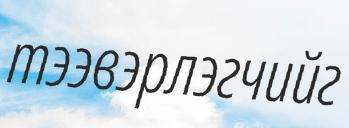
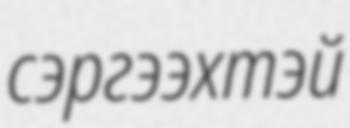
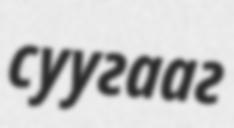
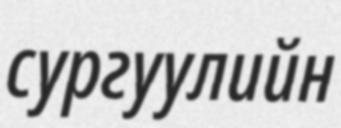
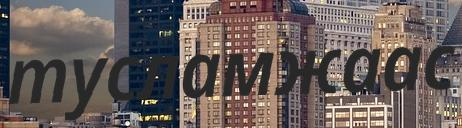
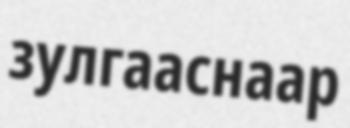
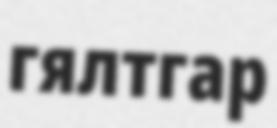

In [11]:
data = pd.DataFrame()

for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()

  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src = "data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.sort_values(by = 'id', ascending = False).to_html(escape = False)
display(HTML(html_all))

# B. 1-с олон үг танихаар сургасан (for fun)

In [12]:
config = parse_args_from_file("mn_conf/demo_parameters_conf.yaml")
config

{'image_folder': 'D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/',
 'saved_model': 'D:/Ground/BolorSoft-OCR/saved_models/eduge_news_uls_tur_words_cyrillic_g2_v4_multiple_word/best_accuracy.pth',
 'batch_max_length': 80,
 'imgH': 32,
 'imgW': 100,
 'rgb': False,
 'character': '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzҮӨАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯүөабвгдеёжзийклмнопрстуфхцчшщъыьэюяЂђЃѓЄєІіЇїЈјЉљЊњЋћЌќЎўЏџҐґҒғҚқҮүҲҳҶҷӀӏӢӣӮӯ!#$%&()*+,-./:;<=>?@[\\]№_{|}~ €₽\n',
 'Transformation': 'None',
 'FeatureExtraction': 'VGG',
 'SequenceModeling': 'BiLSTM',
 'Prediction': 'CTC',
 'input_channel': 1,
 'output_channel': 256,
 'hidden_size': 256}

In [13]:
output = !python deep-text-recognition-benchmark/demo.py --demo_conf mn_conf/demo_parameters_conf.yaml

,img,id,label,conf
0,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/0.png,хэглээний матамалтих,0.0000
1,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/1.png,бологоөт шытгалт,0.0036
2,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/Балай ирдэгээ орчмынхоо_4.jpg,балай ирдэгэ орчиынхо,0.0064
3,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/Начин 2550_2.jpg,начин 2550,0.4555
4,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/Хасалтаар форумуудын мөхлөөс_3.jpg,хаөт өрнйн үлэн,0.0000
5,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/асууддуудтай_5.jpg,асууддуудтай,0.6462
6,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/босгоор дэмбэрэлтэйгээр Олборлолтборлуулалт Британи_4.jpg,ши н,0.0000
7,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/гашуудаж Хабаровск 13528 Яллагдагчийн жинхэлчихжээ_2.jpg,хах ерт ш ндо хат,0.0000
8,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/дурсгалтай бооцоон_1.jpg,дурсгатхай овчон,0.0000
9,,D:/Ground/BolorSoft-OCR/mn_recognition_data/demo_multiple_word/системтэй_1.jpg,системтэй,0.9162

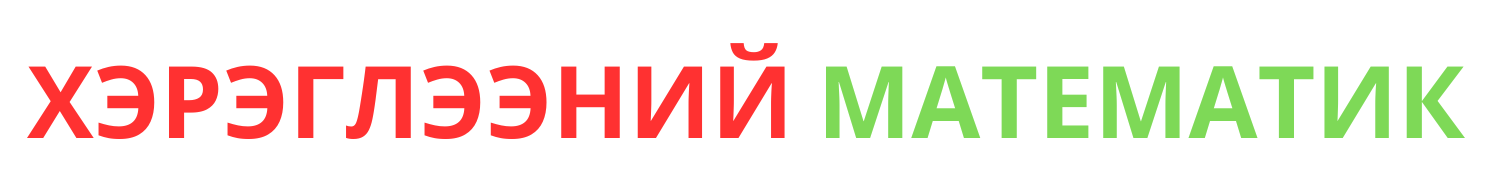
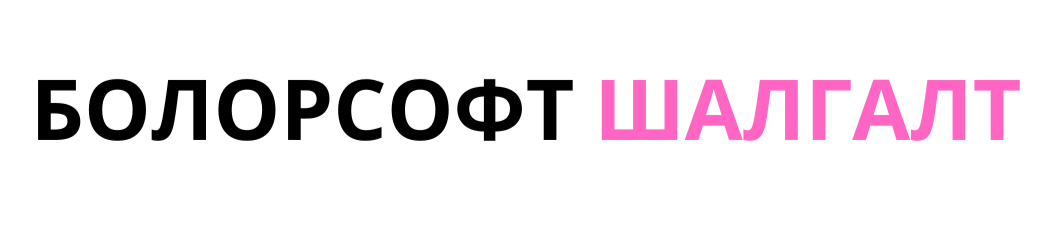
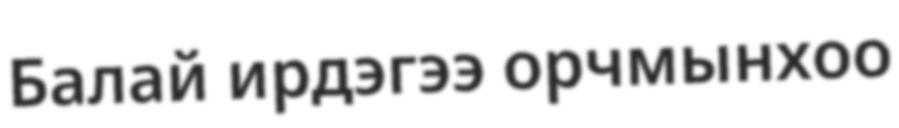
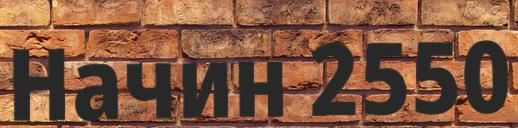
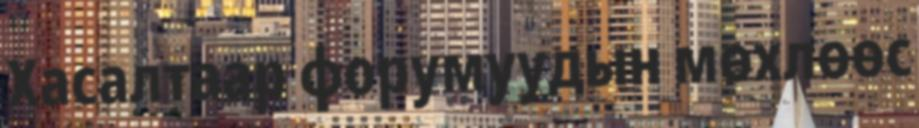
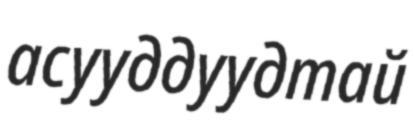
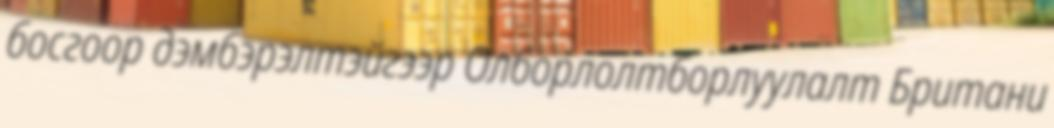
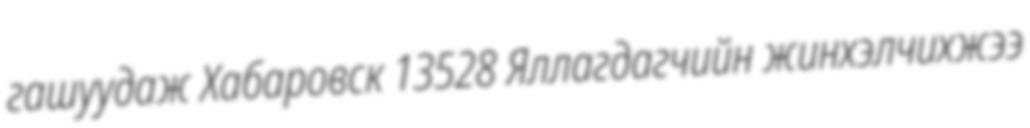
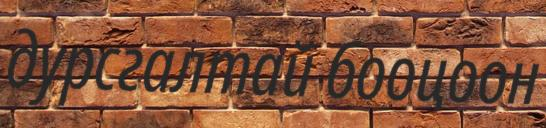
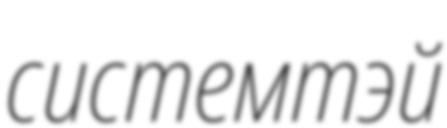
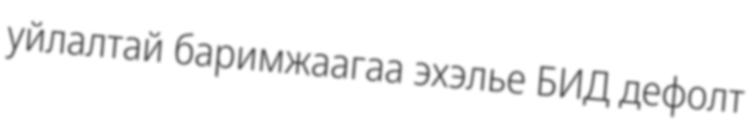
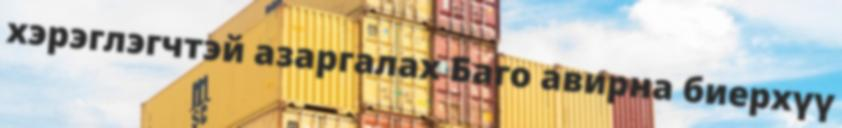
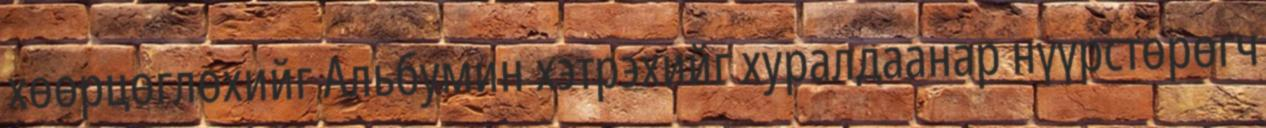
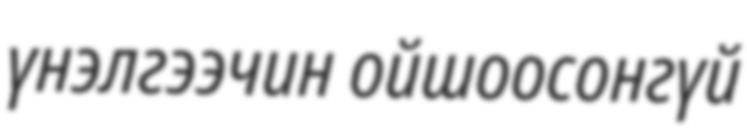

In [14]:
data = pd.DataFrame()

for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()

  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src = "data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape = False)
display(HTML(html_all))